<a href="https://colab.research.google.com/github/Momolunar/git-demo/blob/master/Xente_Fraud_Detection_Zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xente Fraud Detection Classification Challenge

> Notebook by Monde Colephi

## Honour Code

I Monde Colephi, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score#, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [0]:
train = pd.read_csv('../content/training.csv')
test = pd.read_csv('../content/test.csv')

## EDA

In [130]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Number_of_Batch_Trans
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,1
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,1
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,1
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,1


> Have an overview of the data

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
TransactionId            95662 non-null object
BatchId                  95662 non-null object
AccountId                95662 non-null object
SubscriptionId           95662 non-null object
CustomerId               95662 non-null object
CurrencyCode             95662 non-null object
CountryCode              95662 non-null int64
ProviderId               95662 non-null object
ProductId                95662 non-null object
ProductCategory          95662 non-null object
ChannelId                95662 non-null object
Amount                   95662 non-null float64
Value                    95662 non-null int64
TransactionStartTime     95662 non-null object
PricingStrategy          95662 non-null int64
FraudResult              95662 non-null int64
Number_of_Batch_Trans    95662 non-null int64
dtypes: float64(1), int64(5), object(11)
memory usage: 12.4+ MB


In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 16 columns):
TransactionId            45019 non-null object
BatchId                  45019 non-null object
AccountId                45019 non-null object
SubscriptionId           45019 non-null object
CustomerId               45019 non-null object
CurrencyCode             45019 non-null object
CountryCode              45019 non-null int64
ProviderId               45019 non-null object
ProductId                45019 non-null object
ProductCategory          45019 non-null object
ChannelId                45019 non-null object
Amount                   45019 non-null float64
Value                    45019 non-null int64
TransactionStartTime     45019 non-null object
PricingStrategy          45019 non-null int64
Number_of_Batch_Trans    45019 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 5.5+ MB


> We want to check if there are any missing values in the dataset. And if they are, how can we go about to imputing them. But we can see below that there aren't any missing values.

In [133]:
train.isna().sum()

TransactionId            0
BatchId                  0
AccountId                0
SubscriptionId           0
CustomerId               0
CurrencyCode             0
CountryCode              0
ProviderId               0
ProductId                0
ProductCategory          0
ChannelId                0
Amount                   0
Value                    0
TransactionStartTime     0
PricingStrategy          0
FraudResult              0
Number_of_Batch_Trans    0
dtype: int64

In [134]:
test.isna().sum()

TransactionId            0
BatchId                  0
AccountId                0
SubscriptionId           0
CustomerId               0
CurrencyCode             0
CountryCode              0
ProviderId               0
ProductId                0
ProductCategory          0
ChannelId                0
Amount                   0
Value                    0
TransactionStartTime     0
PricingStrategy          0
Number_of_Batch_Trans    0
dtype: int64

In [135]:
train.TransactionId.nunique()

95662

There are 95 662 unique transaction

In [136]:
train.BatchId.nunique()

94809

In [0]:
# Create column with the number of batch transactions

batch_train = dict(train.groupby('BatchId')['TransactionId'].count())
train['Number_of_Batch_Trans'] = train.BatchId.apply(lambda x : batch_train[x])

batch_test = dict(test.groupby('BatchId')['TransactionId'].count())
test['Number_of_Batch_Trans'] = test.BatchId.apply(lambda x : batch_test[x])

In [137]:
train.AccountId.nunique()

3633

In [0]:
# Create column with the number of account transactions

account_train = dict(train.groupby('AccountId')['TransactionId'].count())
train['Number_of_Transactions'] = train.AccountId.apply(lambda x : account_train[x])

account_test = dict(test.groupby('AccountId')['TransactionId'].count())
test['Number_of_Transactions'] = test.AccountId.apply(lambda x : account_test[x])

In [138]:
train.ProviderId.unique()

array(['ProviderId_6', 'ProviderId_4', 'ProviderId_1', 'ProviderId_5',
       'ProviderId_3', 'ProviderId_2'], dtype=object)

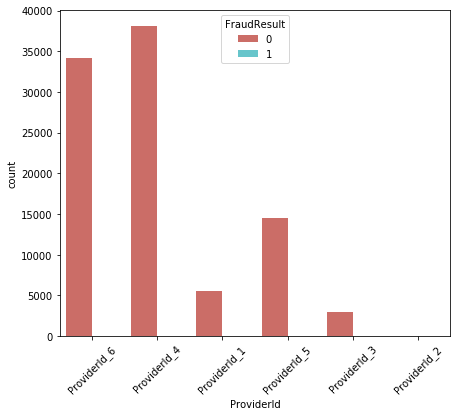

In [142]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'ProviderId', data = train, palette='hls', hue='FraudResult')
plt.xticks(rotation=45)
plt.show()

In [143]:
train.ProductId.unique()

array(['ProductId_10', 'ProductId_6', 'ProductId_1', 'ProductId_21',
       'ProductId_3', 'ProductId_15', 'ProductId_11', 'ProductId_19',
       'ProductId_4', 'ProductId_5', 'ProductId_20', 'ProductId_9',
       'ProductId_24', 'ProductId_14', 'ProductId_2', 'ProductId_13',
       'ProductId_22', 'ProductId_8', 'ProductId_7', 'ProductId_27',
       'ProductId_12', 'ProductId_16', 'ProductId_23'], dtype=object)

In [19]:
len(train.ProductId.unique())

23

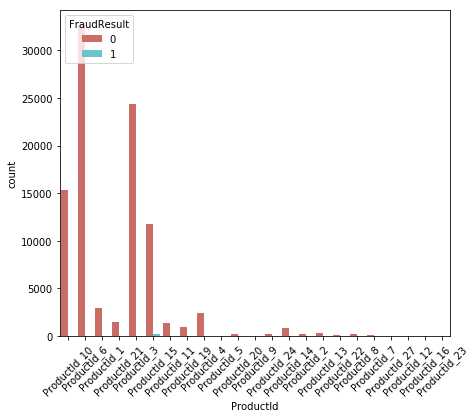

In [144]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'ProductId', data = train, palette='hls', hue='FraudResult')
plt.xticks(rotation=45)
plt.show()

In [145]:
train.ProductCategory.unique()

array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
       'tv', 'transport', 'ticket', 'movies', 'other'], dtype=object)

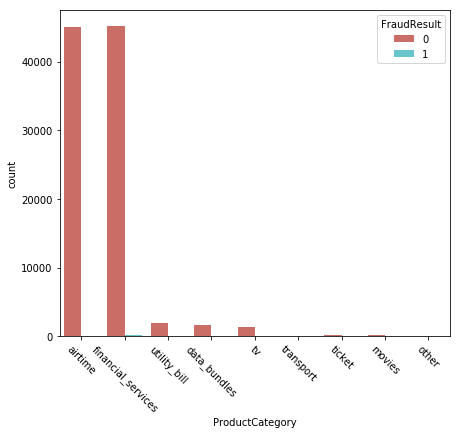

In [147]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'ProductCategory', data = train, palette='hls', hue='FraudResult')
plt.xticks(rotation=-45)
plt.show()

> Most of the users use the airtime and financial services product. But because of the class imbalance, we do not have enough of the defaulting data to see the differences between products represented in the graph, it doesnt even show.

In [148]:
train.ChannelId.unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5'],
      dtype=object)

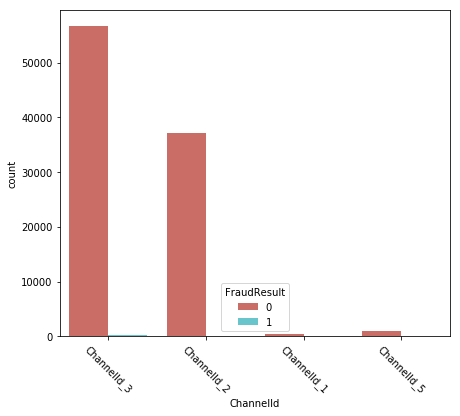

In [149]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'ChannelId', data = train, palette='hls', hue='FraudResult')
plt.xticks(rotation=-45)
plt.show()

# channels : [web, Android, IOS, pay later, checkout]

> Most users are iOS users, followed by Andriod. And for this period there were np pay later users.

In [23]:
train.PricingStrategy.unique()

array([2, 4, 1, 0])

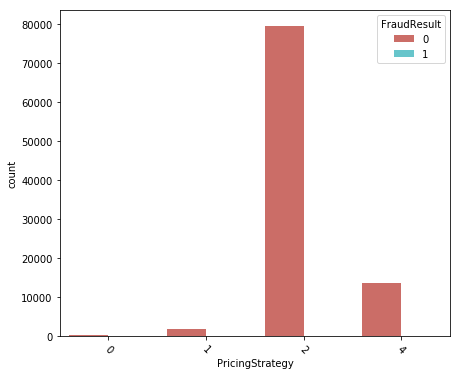

In [150]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'PricingStrategy', data = train, palette='hls', hue='FraudResult')
plt.xticks(rotation=-45)
plt.show()

> Change the TransactionStartTime columns to a datetime format.

Create date features from the TransactionStartTime

In [0]:
# change to date time format

train.TransactionStartTime = pd.to_datetime(train.TransactionStartTime)
test.TransactionStartTime = pd.to_datetime(test.TransactionStartTime)

In [152]:
test.TransactionStartTime.dtype

datetime64[ns, UTC]

In [153]:
train.TransactionStartTime.dtype

datetime64[ns, UTC]

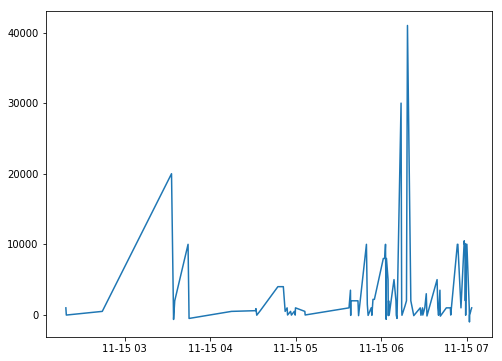

In [52]:
plt.figure(figsize=(8,6))
plt.plot(train.iloc[:100,].TransactionStartTime, train.iloc[:100,].Amount)
plt.show()

In [0]:
# Create TransactionStartTime year, month and day features

train['TransactionStartTime_year'] = train.TransactionStartTime.dt.year
train['TransactionStartTime_month'] = train.TransactionStartTime.dt.month
train['TransactionStartTime_day'] = train.TransactionStartTime.dt.day
train['TransactionStartTime_day_of_week'] = train.TransactionStartTime.dt.dayofweek

test['TransactionStartTime_year'] = test.TransactionStartTime.dt.year
test['TransactionStartTime_month'] = test.TransactionStartTime.dt.month
test['TransactionStartTime_day'] = test.TransactionStartTime.dt.day
test['TransactionStartTime_day_of_week'] = test.TransactionStartTime.dt.dayofweek

In [155]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,1,2018,11,15,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,1,2018,11,15,3
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,1,2018,11,15,3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,1,2018,11,15,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,1,2018,11,15,3


In [156]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13 10:01:40+00:00,4,1,2019,2,13,2
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13 10:02:12+00:00,2,1,2019,2,13,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 10:02:30+00:00,2,1,2019,2,13,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13 10:02:38+00:00,4,1,2019,2,13,2
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13 10:02:58+00:00,2,1,2019,2,13,2


> We want to find out how many fraudulant transactions there are and what relationship do they have with the Amount.

In [157]:
# Count of fraudulant acts

train.FraudResult.sum()

193

In [158]:
# % which are fraudulant transactions

(train.FraudResult.sum()/len(train.FraudResult))*100

0.20175200183981098

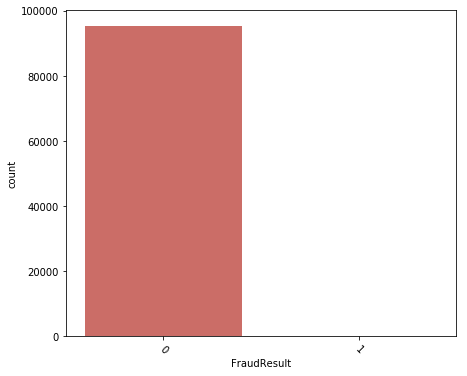

In [159]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'FraudResult', data = train, palette='hls')
plt.xticks(rotation=-45)
plt.show()

In [162]:
train.corr()[['FraudResult', 'Amount']]

,FraudResult,Amount
CountryCode,NaN,NaN
Amount,0.557370,1.000000
Value,0.566739,0.989692
PricingStrategy,-0.033821,-0.061931
FraudResult,1.000000,0.557370
Number_of_Batch_Trans,0.007811,0.004527
TransactionStartTime_year,0.009811,0.010738
TransactionStartTime_month,-0.008887,-0.009060
TransactionStartTime_day,-0.008636,-0.003905
TransactionStartTime_day_of_week,-0.006913,0.004241


> There is moderate correlation between the FraudResult and the Amount and Value.

> There is a very weak correlation between the dates and FraudResult.

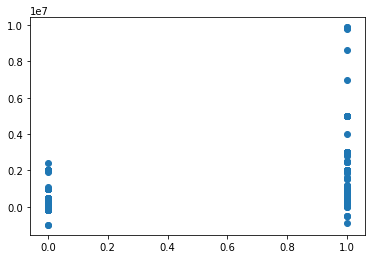

In [163]:
plt.scatter(train.FraudResult, train.Amount)
plt.show()

In [164]:
train[['Amount', 'Value', 'FraudResult']].groupby('FraudResult').count()

,Amount,Value
FraudResult,,
0,95469,95469
1,193,193


In [122]:
train[['Amount', 'Value', 'FraudResult']].groupby('FraudResult').mean()

,Amount,Value
FraudResult,,
0,3.627723e+03,6.763227e+03
1,1.535272e+06,1.561820e+06


> Fraudulent transactions are associated with large amounts of transactions 

In [165]:
train.describe(include='all')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TransactionId_108668,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24 16:30:13+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-15 02:18:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-13 10:01:28+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018,1.036859,2018.497115,6.566233,15.902898,3.011907
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872,0.593079,0.499994,5.224310,8.962822,1.863651
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000,1.000000,2018.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000,1.000000,2018.000000,1.000000,8.000000,1.000000


## Encoding Categorical Variables

In [177]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week,Number_of_Transactions
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,1,2018,11,15,3,66
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,1,2018,11,15,3,30893
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,1,2018,11,15,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,1,2018,11,15,3,26
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,1,2018,11,15,3,30893


In [178]:
df = pd.concat([train, test], sort=False)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week,Number_of_Transactions
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0.0,1,2018,11,15,3,66
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0.0,1,2018,11,15,3,30893
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0.0,1,2018,11,15,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0.0,1,2018,11,15,3,26
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0.0,1,2018,11,15,3,30893


> I will delete the columns that can be representative of a user identifier. I've allocated columns with over 90000 unique values to this category.

In [0]:
drop_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'TransactionStartTime']

In [180]:
df = df.drop(drop_columns, axis = 1)
df.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week,Number_of_Transactions
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0.0,1,2018,11,15,3,66
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0.0,1,2018,11,15,3,30893
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0.0,1,2018,11,15,3,2
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0.0,1,2018,11,15,3,26
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0.0,1,2018,11,15,3,30893


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140681 entries, 0 to 45018
Data columns (total 13 columns):
ProviderId                          140681 non-null object
ProductId                           140681 non-null object
ProductCategory                     140681 non-null object
ChannelId                           140681 non-null object
Amount                              140681 non-null float64
Value                               140681 non-null int64
PricingStrategy                     140681 non-null int64
FraudResult                         95662 non-null float64
Number_of_Batch_Trans               140681 non-null int64
TransactionStartTime_year           140681 non-null int64
TransactionStartTime_month          140681 non-null int64
TransactionStartTime_day            140681 non-null int64
TransactionStartTime_day_of_week    140681 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 15.0+ MB


In [0]:
?pd.get_dummies()

> Create k-1 dummy variables for each category, where k stands for the number of classes in the variable.

In [181]:
# create dummy variables

prefix = ['', '', '', '', 'PricingStrategy']
columns = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy']
encoded_df = df.copy()
for i in range(len(columns)):
    encoded_df = pd.concat([encoded_df, pd.get_dummies(encoded_df[columns[i]], prefix = prefix[i], drop_first=True)], axis = 1)
encoded_df.drop(columns, axis=1, inplace=True)
encoded_df.head()

,Amount,Value,FraudResult,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week,Number_of_Transactions,_ProviderId_2,_ProviderId_3,_ProviderId_4,_ProviderId_5,_ProviderId_6,_ProductId_10,_ProductId_11,_ProductId_12,_ProductId_13,_ProductId_14,_ProductId_15,_ProductId_16,_ProductId_17,_ProductId_18,_ProductId_19,_ProductId_2,_ProductId_20,_ProductId_21,_ProductId_22,_ProductId_23,_ProductId_24,_ProductId_25,_ProductId_26,_ProductId_27,_ProductId_3,_ProductId_4,_ProductId_5,_ProductId_6,_ProductId_7,_ProductId_8,_ProductId_9,_data_bundles,_financial_services,_movies,_other,_retail,_ticket,_transport,_tv,_utility_bill,_ChannelId_2,_ChannelId_3,_ChannelId_4,_ChannelId_5,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,1000.0,1000,0.0,1,2018,11,15,3,66,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-20.0,20,0.0,1,2018,11,15,3,30893,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,500.0,500,0.0,1,2018,11,15,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,20000.0,21800,0.0,1,2018,11,15,3,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,-644.0,644,0.0,1,2018,11,15,3,30893,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [182]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140681 entries, 0 to 45018
Data columns (total 56 columns):
Amount                              140681 non-null float64
Value                               140681 non-null int64
FraudResult                         95662 non-null float64
Number_of_Batch_Trans               140681 non-null int64
TransactionStartTime_year           140681 non-null int64
TransactionStartTime_month          140681 non-null int64
TransactionStartTime_day            140681 non-null int64
TransactionStartTime_day_of_week    140681 non-null int64
Number_of_Transactions              140681 non-null int64
_ProviderId_2                       140681 non-null uint8
_ProviderId_3                       140681 non-null uint8
_ProviderId_4                       140681 non-null uint8
_ProviderId_5                       140681 non-null uint8
_ProviderId_6                       140681 non-null uint8
_ProductId_10                       140681 non-null uint8
_ProductId_11    

## Normalization

> Scale continuous variables

In [0]:
continuous = ['Amount', 'Value', 'Number_of_Transactions']

scaler = StandardScaler()

for var in continuous:
    encoded_df[var] = encoded_df[var].astype('float64')
    encoded_df[var] = scaler.fit_transform(encoded_df[var].values.reshape(-1, 1))

In [184]:
encoded_df.head()

,Amount,Value,FraudResult,Number_of_Batch_Trans,TransactionStartTime_year,TransactionStartTime_month,TransactionStartTime_day,TransactionStartTime_day_of_week,Number_of_Transactions,_ProviderId_2,_ProviderId_3,_ProviderId_4,_ProviderId_5,_ProviderId_6,_ProductId_10,_ProductId_11,_ProductId_12,_ProductId_13,_ProductId_14,_ProductId_15,_ProductId_16,_ProductId_17,_ProductId_18,_ProductId_19,_ProductId_2,_ProductId_20,_ProductId_21,_ProductId_22,_ProductId_23,_ProductId_24,_ProductId_25,_ProductId_26,_ProductId_27,_ProductId_3,_ProductId_4,_ProductId_5,_ProductId_6,_ProductId_7,_ProductId_8,_ProductId_9,_data_bundles,_financial_services,_movies,_other,_retail,_ticket,_transport,_tv,_utility_bill,_ChannelId_2,_ChannelId_3,_ChannelId_4,_ChannelId_5,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,-0.043799,-0.078466,0.0,1,2018,11,15,3,-0.641548,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.052644,-0.086983,0.0,1,2018,11,15,3,1.826089,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.048135,-0.082812,0.0,1,2018,11,15,3,-0.646671,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.120970,0.102305,0.0,1,2018,11,15,3,-0.644750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
4,-0.058056,-0.081560,0.0,1,2018,11,15,3,1.826089,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


> Seperate  train and test data

In [0]:
train_df = encoded_df[encoded_df['FraudResult'].notnull()]
test_df = encoded_df[encoded_df['FraudResult'].isnull()].drop(['FraudResult'], axis=1)

## Model Building

In [0]:
X = train_df.drop('FraudResult', axis=1).values
y = train_df.FraudResult.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## Logistic Regression

> Gives issues with grid search because of the class imbalance, F1 score is undefined (precision = TP/TP+FP)

In [0]:
?LogisticRegression

In [188]:
logistic = LogisticRegression(solver='liblinear') #solver='saga', penalty = 'elasticnet', random_state=42, l1_ratio =0.1
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logistic.predict(X_test)

In [190]:
metrics.f1_score(y_test, y_pred)

0.31884057971014496

In [191]:
metrics.f1_score(y_train, logistic.predict(X_train))

0.4910714285714286

In [192]:
# Create coefficients table

Coefficients = pd.DataFrame(data = logistic.coef_[0], index = train_df.drop('FraudResult', axis=1).columns, columns = ['coefficient'])
Coefficients = Coefficients.sort_values('coefficient', ascending=False)
Coefficients

,coefficient
_ProviderId_3,1.588289
Value,1.536683
_utility_bill,1.122027
_ProductId_13,0.727875
_ProductId_15,0.595115
_financial_services,0.552939
_ProductId_9,0.545247
_ProductId_22,0.491143
_transport,0.328973
_ProductId_5,0.328973


## Random Forest Classifier

> This classifier was ran without making k-1 dummy variables. Will run it again without the mistake and see if results change that much and so that my submissions can be reproducable.

In [0]:
?RandomForestClassifier

In [193]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [194]:
rf.feature_importances_

array([4.82747208e-01, 3.21314450e-01, 4.59474021e-03, 4.14430922e-03,
       7.41495622e-03, 4.81581894e-02, 3.40072682e-02, 5.47448425e-02,
       0.00000000e+00, 1.16717573e-02, 7.18092348e-07, 4.75885079e-03,
       4.27462169e-04, 6.26119556e-05, 1.71589081e-04, 0.00000000e+00,
       3.07252456e-05, 1.29483824e-07, 5.11604774e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.19458507e-06, 6.06980553e-09,
       1.16919386e-08, 9.06151166e-06, 5.19616711e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.16817344e-04, 9.06430463e-05, 2.46503504e-03, 9.44426515e-05,
       0.00000000e+00, 0.00000000e+00, 1.95389494e-03, 6.66574527e-06,
       6.83819300e-04, 7.07843395e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.50646357e-04, 1.47169873e-04, 5.74658149e-04,
       4.77858892e-04, 1.42357338e-03, 0.00000000e+00, 5.87679451e-07,
       7.23361569e-04, 9.78624688e-03, 1.10612518e-03])

In [195]:
metrics.f1_score(y_train, rf.predict(X_train))

0.9686411149825784

In [196]:
metrics.f1_score(y_test, rf.predict(X_test))

0.9148936170212766

In [202]:
cross_val_score(rf, X_train, y_train, cv=10)

array([0.99930314, 0.99958188, 0.99958188, 0.99958188, 0.99972125,
       0.99958188, 0.99944243, 0.99902425, 0.99944243, 0.99930304])

In [203]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.9994146050071355

In [197]:
# Create feature importance table

Feature_Importance = pd.DataFrame(data = rf.feature_importances_, index = train_df.drop('FraudResult', axis=1).columns, columns = ['coefficient'])
Feature_Importance = Feature_Importance.sort_values('coefficient', ascending=False)
Feature_Importance

,coefficient
Amount,4.827472e-01
Value,3.213144e-01
Number_of_Transactions,5.474484e-02
TransactionStartTime_day,4.815819e-02
TransactionStartTime_day_of_week,3.400727e-02
_ProviderId_3,1.167176e-02
PricingStrategy_2,9.786247e-03
TransactionStartTime_month,7.414956e-03
_ProductId_15,5.116048e-03
_ProviderId_5,4.758851e-03


In [79]:
# Submission

submission = pd.DataFrame()
submission['TransactionId'] = test.TransactionId
submission['FraudResult'] = rf.predict(test_df.values)

submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
submission.to_csv('sub_1_rf.csv', index=False)

In [198]:
# Submission

submission = pd.DataFrame()
submission['TransactionId'] = test.TransactionId
submission['FraudResult'] = rf.predict(test_df.values)

submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
submission.to_csv('sub_2_rf.csv', index=False)

## Hyper parameter with Random Forest

In [208]:
parameters = {'n_estimators' : [10, 100, 1000, 2000], 'max_depth' : [None, 5, 10, 20]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=parameters, scoring = 'f1')
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [209]:
grid_result.best_score_

0.8718977004403128

In [221]:
grid_result.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [210]:
grid_result.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [211]:
# Submission

submission = pd.DataFrame()
submission['TransactionId'] = test.TransactionId
submission['FraudResult'] = grid_result.predict(test_df.values)

submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
submission.to_csv('sub_3_grid_rf.csv', index=False)

## Balancing Dataset

Source: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [0]:
from sklearn.utils import resample

# Separate input features and target
y = train_df.FraudResult
X = train_df.drop('FraudResult', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X_b = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X_b[X_b.FraudResult==0]
fraud = X_b[X_b.FraudResult==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

upsampled.FraudResult.value_counts()

In [214]:
upsampled.FraudResult.value_counts()

1.0    71605
0.0    71605
Name: FraudResult, dtype: int64

In [217]:
rf_b = RandomForestClassifier('max_depth': 10, 'n_estimators': 1000, random_state=42)
rf_b.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [218]:
metrics.f1_score(y_train, rf_b.predict(X_train))

0.9785714285714285

In [220]:
metrics.f1_score(y_test, rf_b.predict(X_test))

0.8979591836734695

In [222]:
# Submission

submission = pd.DataFrame()
submission['TransactionId'] = test.TransactionId
submission['FraudResult'] = rf_b.predict(test_df.values)

submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
submission.to_csv('sub_4_b_rf.csv', index=False)